In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:/Data/Algorithms/DATA/mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
X = df.drop('class',axis=1)

In [9]:
y = df['class']

In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
params = {'n_estimators':[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [18]:
model = GradientBoostingClassifier()

In [19]:
grid = GridSearchCV(model,params)

In [20]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [21]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 40}

In [24]:
predict = grid.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

In [25]:
def model_predict(model,y_test,X_test,predict):
    print(classification_report(y_test,predict))
    print('\n')
    print(confusion_matrix(y_test,predict))
    print('\n')
    print(accuracy_score(y_test,predict))
    print(plot_confusion_matrix(model,X_test,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1400
           p       1.00      1.00      1.00      1281

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



[[1400    0]
 [   2 1279]]


0.9992540096978739


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


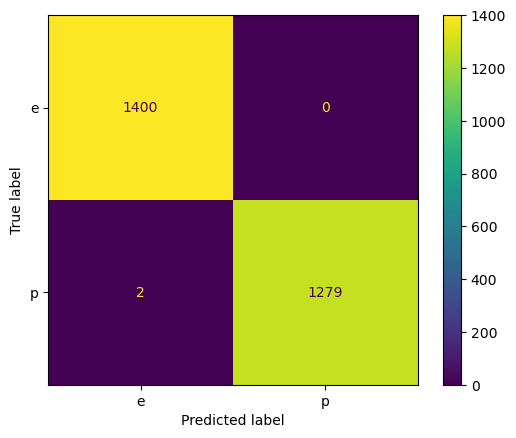

In [26]:
model_predict(grid,y_test,X_test,predict)

In [27]:
features = grid.best_estimator_.feature_importances_
features

array([4.97383858e-18, 2.52176296e-17, 4.43871539e-17, 0.00000000e+00,
       1.20397334e-17, 1.72475282e-03, 1.89474796e-16, 1.16839259e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.81779387e-03, 4.77606580e-02, 4.57016821e-05, 1.75769348e-02,
       2.02141943e-02, 6.52368552e-04, 6.28516739e-01, 6.91514766e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.45799565e-02,
       9.09847971e-03, 0.00000000e+00, 1.61081151e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.73577395e-16, 0.00000000e+00, 6.01500869e-17, 0.00000000e+00,
       0.00000000e+00, 3.77133501e-04, 1.41874157e-01, 4.58687639e-03,
       3.19761061e-02, 3.66353257e-04, 3.09317900e-03, 0.00000000e+00,
       0.00000000e+00, 2.03606379e-03, 2.90923440e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [42]:
feat = pd.DataFrame(index=X.columns,data=features,columns=['Importance'])
feat

,Importance
cap-shape_c,4.973839e-18
cap-shape_f,2.521763e-17
cap-shape_k,4.438715e-17
cap-shape_s,0.000000e+00
cap-shape_x,1.203973e-17
...,...
habitat_l,0.000000e+00
habitat_m,3.863914e-17
habitat_p,0.000000e+00
habitat_u,0.000000e+00


In [43]:
feat = feat.sort_values('Importance',ascending=False)
feat = feat[feat['Importance']>0.0005]
feat

,Importance
odor_n,0.628517
stalk-root_c,0.141874
bruises_t,0.047761
stalk-root_r,0.031976
stalk-surface-below-ring_y,0.029092
spore-print-color_r,0.027902
odor_l,0.020214
odor_f,0.017577
gill-spacing_w,0.014580
gill-size_n,0.009098


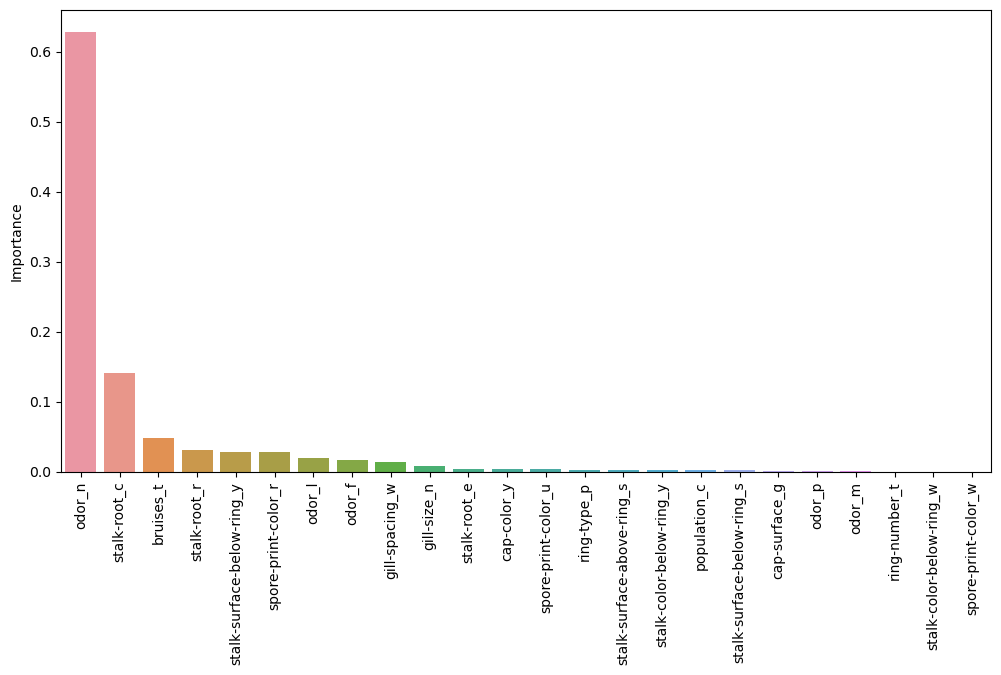

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=feat,x=feat.index,y=feat['Importance'])
plt.xticks(rotation=90);